In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from src.XAI.concepts import concept_instances

In [3]:
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

In [4]:
concept_cavs = {}
for concept in concept_instances.values():
    probe, score = concept.load_torch_probe()
    if score > 0.5:
        cav = probe[1].weight.data.cpu().numpy().squeeze()
        concept_cavs[concept.name] = cav
    print(f"{concept.name:^35} | {score:^10.4f}")

            player low              |   0.9890  
            difficulty              |   0.8440  
           player in air            |   0.9780  
       player dodging in air        |   0.9620  
       player fall velocity         |   0.8120  
      player standing on wall       |   0.9690  
      player dodging on wall        |   0.8330  
          events quantity           |   0.7670  
           visible wall             |   0.9210  
          visible bullet            |   0.8890  
           visible lava             |   0.9570  
           coin quantity            |   0.6890  
        good visible events         |   0.7200  
        bad visible events          |   0.8300  
         two close bullets          |   0.8500  
           bullet close             |   0.7630  
    bullet aligned with player      |   0.7640  
          player dodging            |   0.9510  
          coin above lava           |   0.6400  
         lava below player          |   0.9320  
        bullet below

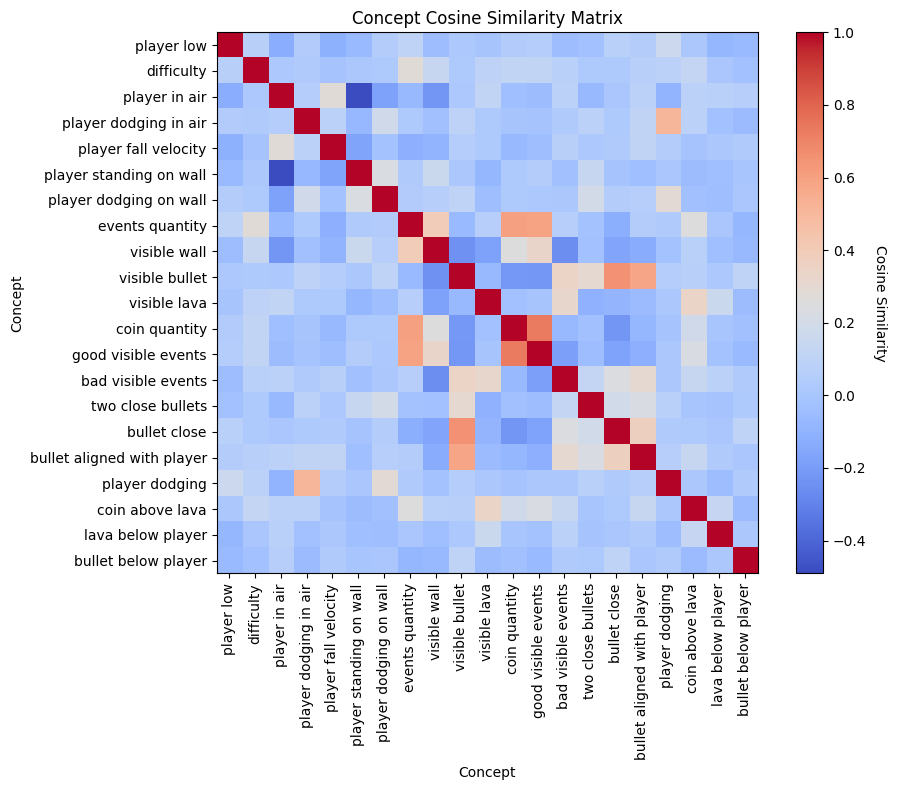

In [5]:
num_concepts = len(concept_cavs)
similarity_matrix = np.zeros((num_concepts, num_concepts))

# Populate the matrix
for i, concept1 in enumerate(concept_cavs):
    for j, concept2 in enumerate(concept_cavs):
        similarity_matrix[i, j] = cosine_similarity(concept_cavs[concept1], concept_cavs[concept2])

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
# set x and y labels
plt.xlabel('Concept')
plt.ylabel('Concept')
cbar = plt.colorbar()
cbar.set_label('Cosine Similarity', rotation=270, labelpad=15)
plt.title('Concept Cosine Similarity Matrix')
plt.xticks(np.arange(num_concepts), concept_cavs.keys(), rotation=90)
plt.yticks(np.arange(num_concepts), concept_cavs.keys())
plt.tight_layout()
plt.savefig('figures/concept_similarity.png', dpi=300)
plt.show()

In [6]:
pairs_with_scores = []
for i, concept1 in enumerate(concept_cavs.keys()):
    for j, concept2 in enumerate(concept_cavs.keys()):
        if i < j:  # No duplicate pairs
            similarity = cosine_similarity(concept_cavs[concept1], concept_cavs[concept2])
            pairs_with_scores.append(((concept1, concept2), similarity))

# Sort pairs based on similarity
sorted_pairs = sorted(pairs_with_scores, key=lambda x: x[1], reverse=True)

# Extract top x and bottom x correlated concept pairs
x = 10
top_x_concepts = sorted_pairs[:x]
bottom_x_concepts = sorted_pairs[-x:]

print(f"Top {x} Correlated Concepts:\n")
print(f"{'Concept 1':^40} | {'Concept 2':^40} | {'Score':^10}")
print('-' * 100)
for (pair, score) in top_x_concepts:
    print(f"{pair[0]:^40} | {pair[1]:^40} | {score:^10.4f} |")

print(f"\nBottom {x} Correlated Concepts:\n")
print(f"{'Concept 1':^40} | {'Concept 2':^40} | {'Score':^10}")
print('-' * 100)
for (pair, score) in bottom_x_concepts:
    print(f"{pair[0]:^40} | {pair[1]:^40} | {score:^10.4f} |")
    

Top 10 Correlated Concepts:

               Concept 1                 |                Concept 2                 |   Score   
----------------------------------------------------------------------------------------------------
             coin quantity               |           good visible events            |   0.7318   |
             visible bullet              |               bullet close               |   0.6537   |
            events quantity              |              coin quantity               |   0.5995   |
            events quantity              |           good visible events            |   0.5921   |
             visible bullet              |        bullet aligned with player        |   0.5789   |
         player dodging in air           |              player dodging              |   0.5074   |
            events quantity              |               visible wall               |   0.3920   |
              bullet close               |        bullet aligned with player    